## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import librosa
import os
import wave
import matplotlib.pyplot as plt

In [2]:
# MLP Classifiers

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [7]:
# LSTM Classifier

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [156]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
def extract_mfcc(wav_file_name):
  # Extracts mfcc features and obtain the mean of each dimension
  # Input: path_to_wav_file
  # Output: mfcc_features '''
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

  return mfccs

In [158]:
# Load RAVDESS Speech Dataset
ravdess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/RAVDESS_Dataset_Kaggle'):
  for filename in filenames:
    #print(os.path.join(dirname, filename))
    ravdess_speech_labels.append(int(filename[7:8])-1) # the index 7 and 8 represent the emotion label
    wav_file_name = os.path.join(dirname, filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file

In [159]:
ravdess_speech_data

[array([-5.17756958e+02,  4.80201187e+01, -1.02214184e+01,  7.83182001e+00,
        -1.72147676e-01, -2.17306638e+00, -1.04225121e+01, -9.23361206e+00,
        -1.78789635e+01, -4.91338158e+00,  1.70234230e-03, -9.14392185e+00,
         1.18756235e-01, -3.85967159e+00, -6.97212553e+00,  1.75644696e+00,
        -9.52506924e+00, -3.88826609e+00, -2.35109210e+00, -4.75559902e+00,
        -7.04094648e+00, -2.42230582e+00, -4.76879835e+00, -5.40075588e+00,
        -4.15754986e+00, -2.95848370e+00, -5.85479021e+00, -1.77689099e+00,
        -5.05795193e+00, -1.93159425e+00, -2.70471334e-01, -3.04178029e-01,
         1.78866482e+00,  9.04830575e-01,  4.70114172e-01,  1.74151993e+00,
         3.05948877e+00,  2.27189255e+00,  9.89515066e-01,  2.28201795e+00],
       dtype=float32),
 array([-7.0454132e+02,  6.8829437e+01,  4.7289548e+00,  1.1950599e+01,
         5.6388826e+00,  5.8340931e+00, -4.8624897e+00, -4.8628001e+00,
        -8.3084526e+00, -4.8761916e+00,  2.3179226e+00,  1.2227499e+00,


In [160]:
# Convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to array
ravdess_speech_label_array = np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimension

# Make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2880, 8)

In [161]:
ravdess_speech_data_array

array([[-5.1775696e+02,  4.8020119e+01, -1.0221418e+01, ...,
         2.2718925e+00,  9.8951507e-01,  2.2820179e+00],
       [-7.0454132e+02,  6.8829437e+01,  4.7289548e+00, ...,
        -3.3131680e+00, -4.8602929e+00, -2.7604830e+00],
       [-5.5992334e+02,  5.4875935e+01, -1.1518561e+01, ...,
         5.2985730e+00,  1.6244540e+00,  2.3601290e-02],
       ...,
       [-5.0247842e+02,  3.1300743e+01, -2.3074377e+01, ...,
         3.9498901e-01, -6.4904052e-01,  4.5728469e-01],
       [-5.3246722e+02,  3.7716980e+01, -1.4932143e+01, ...,
        -1.1261468e+00, -1.2194099e+00, -2.6592138e-01],
       [-5.1081024e+02,  3.1598337e+01, -2.3875683e+01, ...,
        -2.2801270e+00, -2.6268065e+00,  6.8598545e-01]], dtype=float32)

In [162]:
ravdess_speech_data_array.shape

(2880, 40)

In [163]:
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.25, random_state=9)

In [164]:
# Split training, validating, and testing sets

number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [165]:
# Define LSTM Model

def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

# Configure the model for training

  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [166]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [167]:
w.shape

(2304, 40, 1)

In [168]:
# Train using LSTM Model

model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True )

Epoch 1/130
72/72 [==============================] - 9s 88ms/step - loss: 2.0751 - accuracy: 0.1332 - val_loss: 2.0518 - val_accuracy: 0.1493
Epoch 2/130
72/72 [==============================] - 4s 49ms/step - loss: 2.0244 - accuracy: 0.1853 - val_loss: 1.9485 - val_accuracy: 0.2743
Epoch 3/130
72/72 [==============================] - 4s 49ms/step - loss: 1.9689 - accuracy: 0.2109 - val_loss: 1.8789 - val_accuracy: 0.2708
Epoch 4/130
72/72 [==============================] - 5s 68ms/step - loss: 1.9424 - accuracy: 0.2283 - val_loss: 1.8472 - val_accuracy: 0.3194
Epoch 5/130
72/72 [==============================] - 7s 92ms/step - loss: 1.9032 - accuracy: 0.2609 - val_loss: 1.8301 - val_accuracy: 0.2708
Epoch 6/130
72/72 [==============================] - 4s 51ms/step - loss: 1.8517 - accuracy: 0.2834 - val_loss: 1.8271 - val_accuracy: 0.2743
Epoch 7/130
72/72 [==============================] - 4s 50ms/step - loss: 1.8399 - accuracy: 0.2869 - val_loss: 1.8080 - val_accuracy: 0.3021
Epoch 

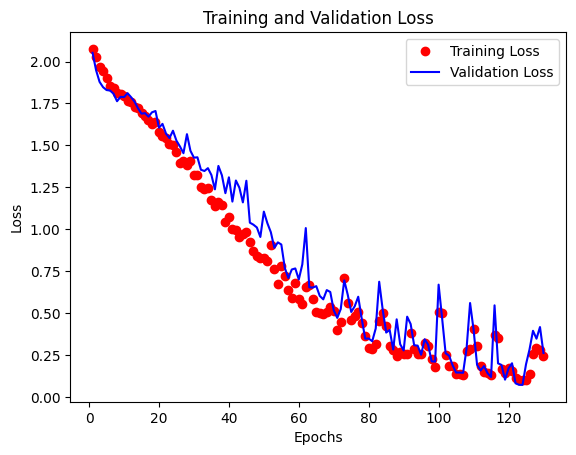

In [169]:
# loss plots using LSTM Model

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

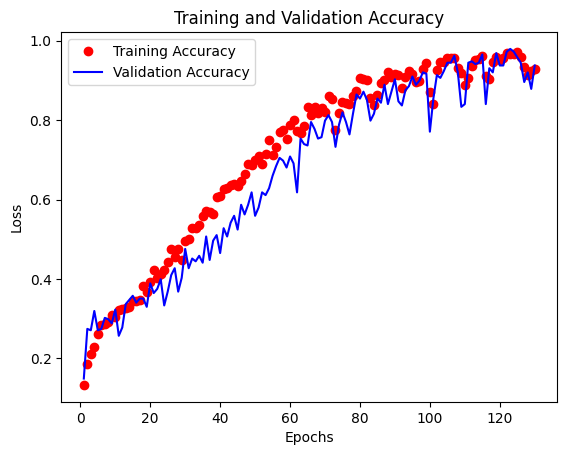

In [171]:
# accuracy plots using LSTM Model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [174]:
# Evaluate using Model A

model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 52ms/step - loss: 0.1050 - accuracy: 0.9792


[0.1050199642777443, 0.9791666865348816]

In [175]:
emotions = { 1 : 'Neutral', 2 : 'Calm', 3 : 'Happy', 4 : 'Sad', 5 : 'Angry', 6 : 'Fearful', 7 : 'Disgust', 8 : 'Surprised'}
def predict(wav_filepath):
  test_point = extract_mfcc(wav_filepath)
  test_point = np.reshape(test_point, newshape=(1,40,1))
  predictions = model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [176]:
predict('/content/drive/MyDrive/RAVDESS_Dataset_Kaggle/Actor_01/03-01-01-01-01-01-01.wav')

1/1 [==============================] - 2s 2s/step
Neutral


In [177]:
predict('/content/drive/MyDrive/RAVDESS_Dataset_Kaggle/Actor_01/03-01-08-02-02-02-01.wav')

1/1 [==============================] - 0s 32ms/step
Surprised


In [178]:
model_A.save('SER-V2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
modelc = tf.keras.models.load_model('SER-V2.h5')